# IMPORT LIBRARY YANG DIBUTUHKAN

In [51]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, jarque_bera
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from pycaret.regression import *
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATA
Data diperoleh dari kaggle. Link kaggle adalah sebagai berikut: https://www.kaggle.com/datasets/vikasukani/forest-firearea-datasets/data?select=forestfires.csv

In [52]:
data=pd.read_csv('forestfires.csv')

In [53]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Penjelasan Variabel
Number of Attributes: 12 + output attribute
Note: several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.

Attribute information:
X - x-axis spatial coordinate within the Montesinho park map: 1 to 9\
Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9\
month - month of the year: "Jan" to "dec"\
day - day of the week: "mon" to "sun"\
FFMC - FFMC index from the FWI system: 18.7 to 96.20\
DMC - DMC index from the FWI system: 1.1 to 291.3\
DC - DC index from the FWI system: 7.9 to 860.6\
ISI - ISI index from the FWI system: 0.0 to 56.10\
temp - the temperature in Celsius degrees: 2.2 to 33.30\
RH - relative humidity in %: 15.0 to 100\
wind - wind speed in km/h: 0.40 to 9.40\
rain - outside rain in mm/m2 : 0.0 to 6.4\
area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

In [54]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Problem Statement & Machine Learning Objective
Problem Statement:
Kebakaran hutan dapat memberikan dampak kerugian yang cukup besar, diantaranya musnahnya flora dan fauna, menurunkan kemampuan dunia untuk menyimpan CO2 karena hutan berfungsi sebagai penyimpan CO2, asap dan debu hasil kebakaran dapat mengganggu kesehatan masyarakat sekitar.

Problem :
Bagaimana mendeteksi risiko kebakaran hutan dan faktor-faktor yang mempengaruhi kebakaran hutan ?

ML objective :
Membuat model pendeteksi kebakaran hutan dan mengidentifikasi faktor-faktor penting yang dapat mempengaruhi kebakaran hutan.

Algoritma :
Supervised Learning-Regresi

# DATA CLEANING

# Missing value

In [55]:
data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Tidak terdapat observasi yang memiliki nilai kosong

# Duplicate Values

In [56]:
data.duplicated().sum()

4

In [57]:
dup=data.duplicated()

In [58]:
data[dup]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


terdapat 4 data yang duplicate, mari kita cek baris mana saja yang duplicate

In [59]:
data.loc[(data['DC']==654.1) & (data['temp']==20.4) | 
         (data['DC']==601.4) & (data['temp']==19.8) |
         (data['DC']==80.8) & (data['temp']==17.0) |
         (data['DC']==232.1) & (data['temp']==19.2) ,:]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
52,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
99,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
214,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
302,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


data yang duplicate adalah data pada baris 52,53,99,100,214,215,302,302

In [61]:
data.drop_duplicates(keep='first', inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       513 non-null    int64  
 1   Y       513 non-null    int64  
 2   month   513 non-null    object 
 3   day     513 non-null    object 
 4   FFMC    513 non-null    float64
 5   DMC     513 non-null    float64
 6   DC      513 non-null    float64
 7   ISI     513 non-null    float64
 8   temp    513 non-null    float64
 9   RH      513 non-null    int64  
 10  wind    513 non-null    float64
 11  rain    513 non-null    float64
 12  area    513 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 56.1+ KB


In [63]:
data.duplicated().sum()

0

kita drop feature atau variabel yang tidak akan kita gunakan seperti lokasi, bulan, dan hari

In [64]:
data=data.drop(['X', 'Y', 'month', 'day'], axis=1)

# PISAHKAN DATA TRAIN DAN TEST

In [65]:
X = data.drop(columns = "area")
y = data["area"]

In [96]:
#Split Data 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 123)

# EXPLORATORY DATA ANALYSIS

gabungkan X_train dan y_train untuk keperluan EDA

In [106]:
train=pd.merge(X_train, y_train, left_index=True, right_index=True)

correlation matrix

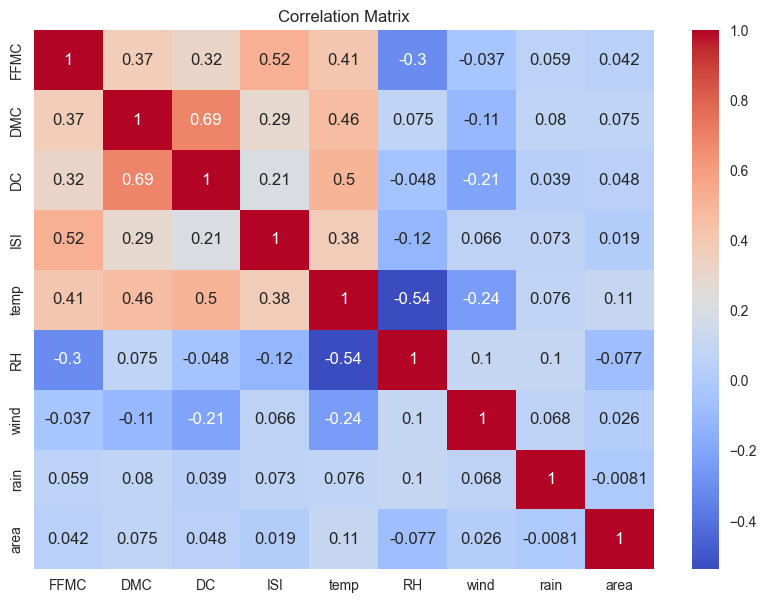

In [68]:
plt.figure(figsize=(10,7))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

histogram

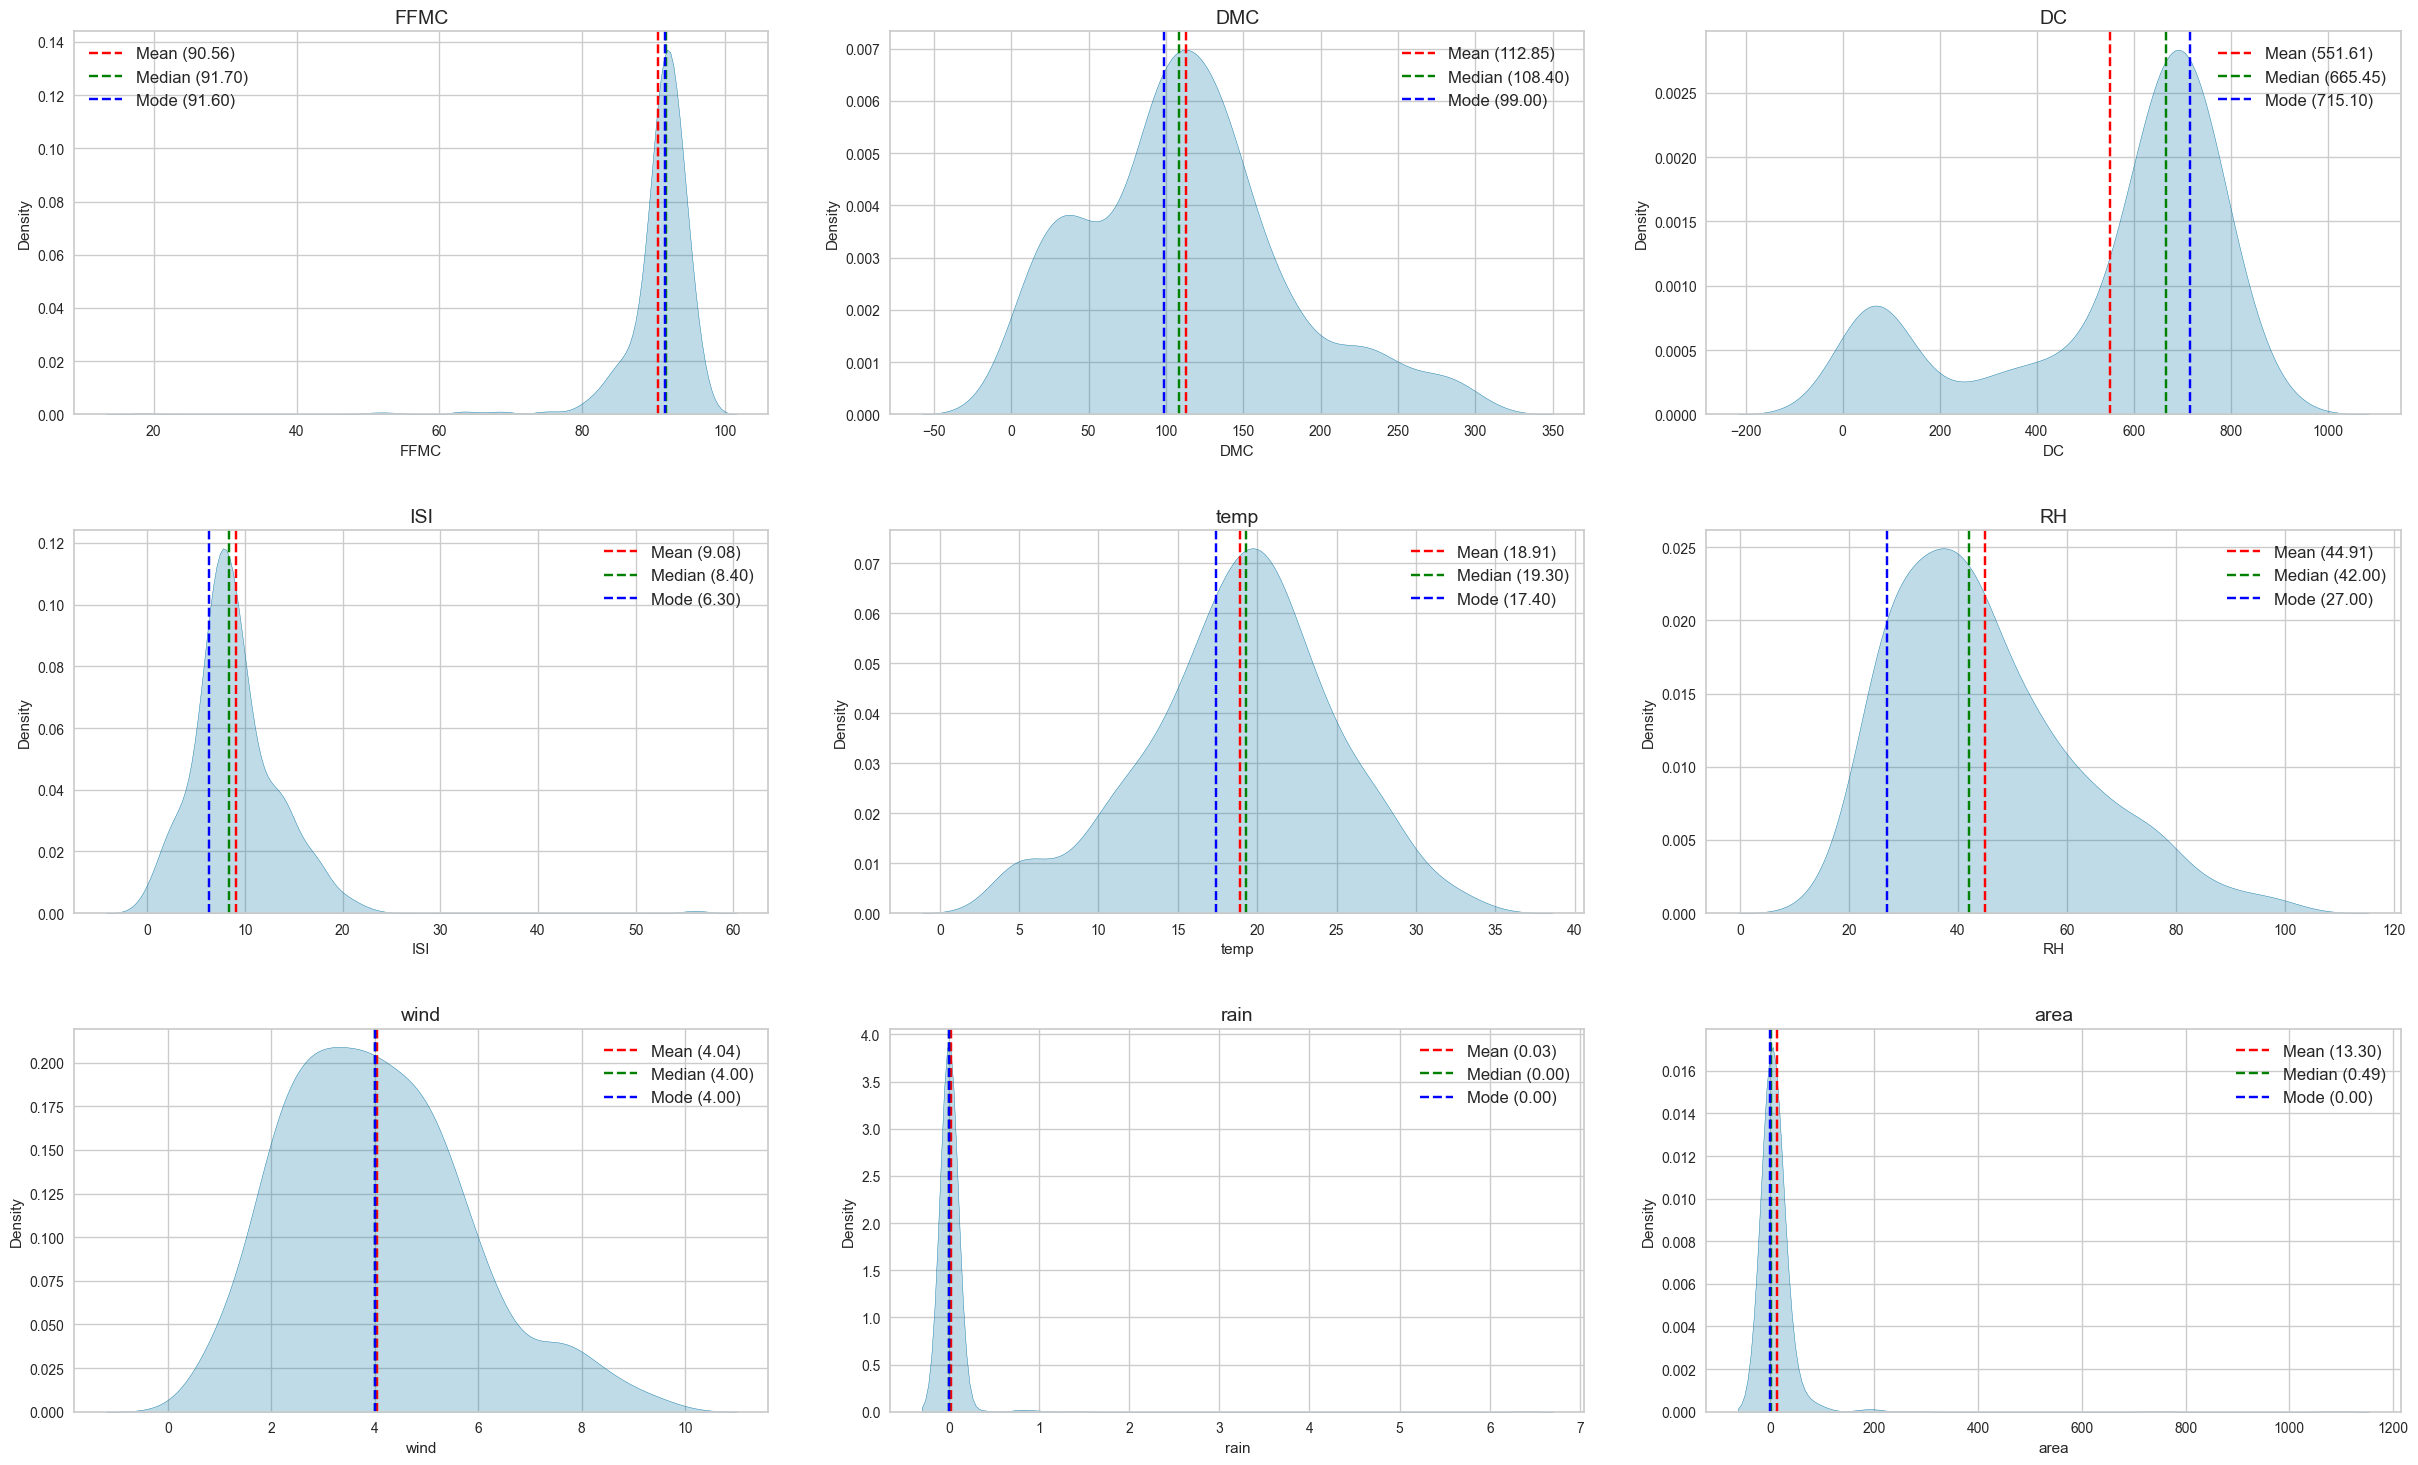

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Setting the number of rows and columns for subplots
num_rows = 5
num_cols = 3

# Calculating the total number of subplots
total_subplots = num_rows * num_cols

# Adjusting the figure size
plt.figure(figsize=(25, 25))

# Initializing the subplot index
subplot_index = 1

# Looping through each column to visualize the data distribution
for col in train.columns:
    if train[col].dtype != 'object':
        # Creating a subplot
        plt.subplot(num_rows, num_cols, subplot_index)
        
        # Using kdeplot to visualize the distribution
        ax = sns.kdeplot(train[col], shade=True)
        
        # Calculating mean, median, and mode
        mean_val = train[col].mean()
        median_val = train[col].median()
        mode_val = stats.mode(train[col])[0]
        
        # Adding lines for mean, median, and mode
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val:.2f})')
        ax.axvline(mode_val, color='blue', linestyle='--', label=f'Mode ({mode_val:.2f})')
        
        # Setting the title
        ax.set_title(col, fontsize=14)
        
        # Adding a legend
        plt.legend(fontsize=12)
        
        # Incrementing the subplot index
        subplot_index += 1

# Adjusting the layout of subplots for better readability
plt.tight_layout(pad=3.0)

# Showing the plot
plt.show()

FFMC       Axes(0.125,0.653529;0.133621x0.226471)
DMC     Axes(0.285345,0.653529;0.133621x0.226471)
DC       Axes(0.44569,0.653529;0.133621x0.226471)
ISI     Axes(0.606034,0.653529;0.133621x0.226471)
temp    Axes(0.766379,0.653529;0.133621x0.226471)
RH         Axes(0.125,0.381765;0.133621x0.226471)
wind    Axes(0.285345,0.381765;0.133621x0.226471)
rain     Axes(0.44569,0.381765;0.133621x0.226471)
area    Axes(0.606034,0.381765;0.133621x0.226471)
dtype: object

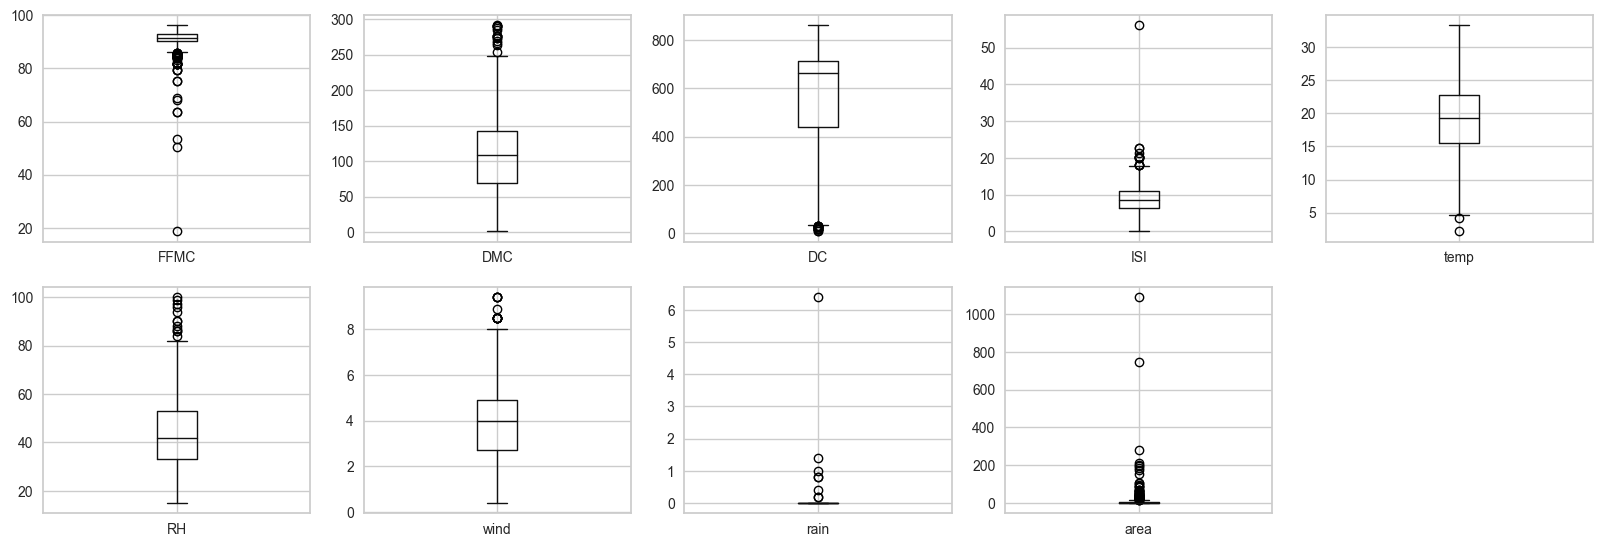

In [70]:
data.plot(kind='box', subplots=True, layout = (3,5), sharex = False, sharey = False, figsize = (20, 10), color = 'k')

# DATA MODELING

using sklearn

In [98]:
model = LinearRegression()

linreg = model.fit(X_train, y_train)

y_pred=linreg.predict(X_test)
y_pred_train=linreg.predict(X_train)

In [100]:
for col, coef in zip(X_train.columns, linreg.coef_):
    print('Column:{}, \tcoef:{}'.format(col, coef))

Column:FFMC, 	coef:-0.07545441870965247
Column:DMC, 	coef:0.08376594850251118
Column:DC, 	coef:-0.00909367175471694
Column:ISI, 	coef:-0.5453387820811707
Column:temp, 	coef:1.0929616867991856
Column:RH, 	coef:-0.18236054920795167
Column:wind, 	coef:2.2699550499347954
Column:rain, 	coef:-3.448627521668696


using statmodel

In [104]:
X_1 = sm.add_constant(X_train)

# Fit the regression model
model = sm.OLS(y_train, X_1)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9342
Date:                Thu, 23 May 2024   Prob (F-statistic):              0.488
Time:                        20:00:11   Log-Likelihood:                -2316.1
No. Observations:                 410   AIC:                             4650.
Df Residuals:                     401   BIC:                             4686.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8951     70.068     -0.013      0.9

# MODEL EVALUATION

In [101]:
print('MSE train:', mean_squared_error(y_train, y_pred_train))
print('MAE train:',mean_absolute_error(y_train, y_pred_train))
print('MAPE train', mean_absolute_percentage_error(y_train, y_pred_train))

print('MSE test:', mean_squared_error(y_test, y_pred))
print('MAE test:',mean_absolute_error(y_test, y_pred))
print('MAPE test', mean_absolute_percentage_error(y_test, y_pred))

MSE train: 4721.957647663889
MAE train: 20.061138283873408
MAPE train 2.8706659143221316e+16
MSE test: 1187.021240686502
MAE test: 19.22161980444374
MAPE test 2.941103327469326e+16


# OTHER TECHNICS USING PYCARET

In [107]:
reg=setup(data=data, target='area', session_id=123, train_size=0.7)

,Description,Value
0,Session id,123
1,Target,area
2,Target type,Regression
3,Original data shape,"(513, 9)"
4,Transformed data shape,"(513, 9)"
5,Transformed train set shape,"(359, 9)"
6,Transformed test set shape,"(154, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [108]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,14.4958,5600.2877,50.8949,-0.0950,1.4074,1.0189,0.0140
br,Bayesian Ridge,21.0721,5469.9461,51.2047,-0.5434,2.1245,6.0701,0.0120
dummy,Dummy Regressor,21.1393,5478.9558,51.2798,-0.5559,2.1384,5.9767,0.0090
omp,Orthogonal Matching Pursuit,21.0268,5468.4203,51.2934,-0.5806,2.1078,6.3463,0.0070
en,Elastic Net,22.0874,5447.2495,52.1915,-0.8926,2.1029,7.5382,0.0090
llar,Lasso Least Angle Regression,22.1088,5449.4086,52.2325,-0.9069,2.1031,7.5734,0.0130
lasso,Lasso Regression,22.1089,5449.4126,52.2327,-0.9070,2.1031,7.5734,0.4030
ridge,Ridge Regression,22.4584,5463.4477,52.4278,-0.9682,2.1101,7.7972,0.0090
lr,Linear Regression,22.5191,5473.1569,52.4693,-0.9695,2.1110,7.8107,0.6830
lar,Least Angle Regression,22.6074,5481.0336,52.5300,-0.9731,2.1196,7.7645,0.0130


In [109]:
huber=create_model("huber")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.1860,521.0895,22.8274,-0.2878,1.5697,1.0278
1,6.4070,248.8387,15.7746,-0.0637,1.2162,1.1024
2,36.2118,33054.5131,181.8090,-0.0369,1.5287,0.7549
3,16.8112,3235.2792,56.8795,-0.0616,1.5150,0.7973
4,8.9632,441.8935,21.0213,-0.0941,1.3583,1.0106
5,3.8956,48.3733,6.9551,-0.0982,1.0727,0.6886
6,4.0542,76.2180,8.7303,-0.0294,1.0805,2.5435
7,15.9376,2090.5851,45.7229,-0.1006,1.5077,0.7562
8,29.9094,15716.6237,125.3660,-0.0512,1.6839,0.7770


In [110]:
tunehuber=tune_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.1539,487.3516,22.0760,-0.2044,1.4812,1.3664
1,7.1051,234.0237,15.2978,-0.0004,1.3828,1.9731
2,36.3397,32920.7793,181.4408,-0.0327,1.4821,1.0650
3,17.8726,3185.2338,56.4379,-0.0452,1.6550,1.3395
4,9.4652,418.5788,20.4592,-0.0364,1.4417,1.4837
5,4.7202,46.1780,6.7954,-0.0484,1.2275,1.1561
6,4.9654,71.2568,8.4414,0.0376,1.3332,5.1019
7,16.2252,2044.1136,45.2119,-0.0761,1.5070,1.0625
8,29.8046,15580.0775,124.8202,-0.0421,1.5877,0.8623


Fitting 10 folds for each of 10 candidates, totalling 100 fits


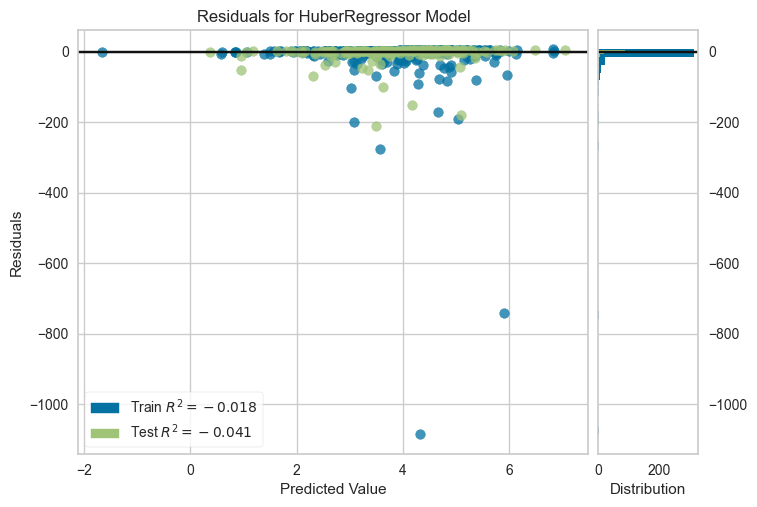

In [111]:
plot_model(tunehuber)

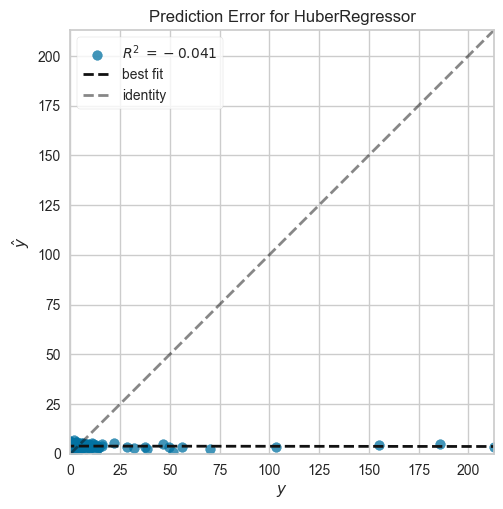

In [112]:
plot_model(tunehuber, plot="error")